# Reinforcement Learning, Part 1: Agents, States, and Rewards  

Here we will show the simplest form of RL: An agent going through a simple environment with a determinstic succession of states.

## The environment

The environment represents a prototypical conditing paradigm. It is made of three states, which represent an initial  cue, a delay, and a reward. This captures a simple experiment such as the case in which a primate is given reward (juice) after a blue light is presented.

An environment is defined by two functions, the state transition matrix $P(s,a,s')$ and a reward transition matrix $R(s,a,s')$. In this simple case, the agent does not act---it is simply observing the environment. So, we can define $P(s,s')$ and $R(s,s')$ without any reference to any action $a$. Furthermore, because the environment is deterministic, we can represent both $P(s,s')$ and $R(s,s')$ as matrices.

The environment transitions are given to the agent in the form of a state-reward pair, which, in Python, will be represented as a tuple `(new_state, new_reward)`.

In [7]:
import matplotlib.pyplot as plt 
class Environment:
    """A simple environment"""
    STATE_TRANSITIONS = {"cue" : "wait",
                         "wait" : "juice"}
    
    REWARD_TRANSITIONS = {"cue" : 0,
                         "wait" : 0,
                         "juice" : 1,
                         None : 0}
    
    def __init__(self):
        """Initializes the environment"""
        self.state = "cue"
    
    
    def transition(self):
        """Transitions, and returns the state-reward pair"""
        result = None
        state = self.state
        if state in Environment.STATE_TRANSITIONS.keys():
            new_state = Environment.STATE_TRANSITIONS[state]
            self.state = new_state
            result = (new_state, Environment.REWARD_TRANSITIONS[new_state])
        else:
            self.state = None
        return result

### Testing the environment

Let's test the environment works

In [3]:
e = Environment()
print("State 1: '%s'" % (e.state,))
res = e.transition()
print("State 2: '%s', Reward = %s" % res)
res = e.transition()
print("State 3: '%s', Reward = %s" % res)
res = e.transition()
print("After state 3: '%s'" % (e.state,))


State 1: 'cue'
State 2: 'wait', Reward = 0
State 3: 'juice', Reward = 1
After state 3: 'None'


## Creating a V-Agent

Now, let's create a simple agent that just observes states and estimates their values by creating a $V$-table. Because the number of states is so small, the $V$-table can be initialized right away.

In [8]:
class VAgent():
    """An agent that passively observes states"""
    def __init__(self):
        self.V = {"cue" : 0,
                 "wait" : 0,
                 "juice" : 0,
                 None : 0}
        self.gamma = 0.9
        self.alpha = 0.1
        
    def learnV(self, state1, reward1, state2):
        """Learns from rewards"""
        V1 = self.V[state1]
        V2 = self.V[state2]
        g = self.gamma
        a = self.alpha
        
        rpe = reward1 + g * V2 - V1
        V1 = V1 + a * rpe
        
        self.V[state1] = V1
        
    
    def visualizeV(self, title="V table"):
        """Visualizes the V-table"""
        states = ["cue", "wait", "juice", None]
        values = [self.V[x] for x in states]
        fig, ax = plt.subplots()
        ax.axis([-0.5, 3.5, 0, 1.0])
        ax.set_xticks([0, 1, 2, 3])
        ax.set_xticklabels([str(x) for x in states])
        ax.set_ylabel("Value V")
        ax.set_xlabel("States")
        ax.bar([0, 1, 2, 3], values, color='black')
        ax.set_title(title)


## Interactions between agent and environment
Now, we need to define how to run a trial. 

In [10]:
def run_trial(environment, agent):
    while environment.state is not None:
        state = environment.state
        reward = environment.REWARD_TRANSITIONS[state]
        
        # This is the moment in which we learn!
        transition = environment.transition()
        new_state = None
        if transition is not None:
            new_state = transition[0]
        
        agent.learnV(state, reward, new_state)
        
def run_trials(environment, agent, n):
    for j in range(n):
        environment.state = "cue"
        run_trial(environment, agent)
        

## Testing the system

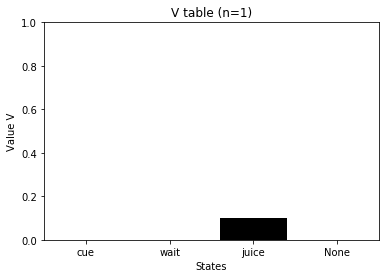

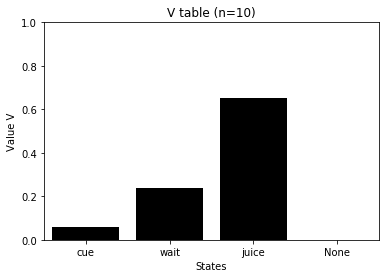

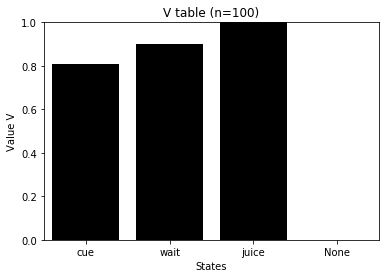

In [11]:
states = ["cue", "wait", "juice", None]
a = VAgent()
e = Environment()
run_trials(e, a, 1)
a.visualizeV("V table (n=1)")
run_trials(e, a, 9)
a.visualizeV("V table (n=10)")
run_trials(e, a, 90)
a.visualizeV("V table (n=100)")